In [165]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [186]:
# node class that each spot in the map will occupy
# cell location and goal_location are tuples representing index 
# of current cell location and goal cell locations
class Node:
    def __init__(self, parent, c2c, is_obstacle, cell_location):
        self.parent = parent
        self.c2c = c2c
        self.is_obstacle = is_obstacle
        self.cell_location = cell_location
        
        # if obstacle, set cell color to be blue
        if self.is_obstacle:
            self.cell_color = [0, 0, 255]
        # if unvisited, then set cell color to white
        elif self.c2c == np.Infinity:
            self.cell_color = [0, 0, 0]
        # if visited then set cell color to red
        else:
            self.cell_color[255, 255, 255]

In [187]:
def check_obstacle(w, h):

    # check to see if the cell is in the circle
    if(np.sqrt((w-200)**2 + (h-50)**2) <= 80):
        return True       

    # check triangle shape
    # divided into three shapes
    # left corner
    #      checking x bound                 checking below top slope                checking above bottom slope
    
    
    # top_slope_eq = 173.60759493670886 + (210-185)/(115-36)*w
    # bottom_slope_eq = 213.72340425531914 + (110-185)/(130-36)*w
    # if (w >= 36 and w <=80) and (h <=top_slope_eq) and (h >= bottom_slope_eq):
    #     return True
    # # now check to see if we are in the bounds of the concave parts
    # top_concave_slope_eq = 90 + (210-180)/(115-80)*w
    # bottom_concave_slope_eq = 309.3478260869565 + (100-185)/(105-36)*w
    # if (w >= 80 and w <= 115) and (h <=top_slope_eq) and (h >= top_concave_slope_eq):
    #     return True
    # if (w >= 80 and w <= 105) and (h >=bottom_slope_eq) and (h <= bottom_concave_slope_eq):
    #     return True


    return False

In [188]:
# create the board

def create_board(width, height, goal_location):

    board = []
    for h in range(0, height):
        row = []
        for w in range(0, width):

            c2c = np.Infinity
            is_obstacle = check_obstacle(w, h)

            new_node = Node(parent=None, c2c=c2c, is_obstacle=is_obstacle, cell_location=(w, h))
            row.append(new_node)

        board.append(row)

    return board

In [189]:
# pull the color data from the graph and export it to an np.array
# so that I can plot the colot of each cell with matplotlib

def gen_color_map(board):
    color_board = []
    for row in board:
        data = list(node.cell_color for node in row)
        color_board.append(data)

    color_array = np.array(color_board)
    return color_array

In [190]:
def get_start_node(x, y, board):
    if (x>=0 and x < 400) and (y >= 0 and y < 249):
        if board[x][y].is_obstacle == False:
            return board[x][y]
        else:
            print('Board Location is in an obstacle. Choose another location')
            return
            
    print('Board Location Out of bounds. Choose another Location')
    return

In [191]:
start_location = (0, 0)
width = 400
height = 250
goal_location = (399, 100)

board = create_board(width, height, goal_location=goal_location)
color_map = gen_color_map(board)
start_node = get_start_node(start_location[0], start_location[1], board)
start_node.c2c = 0

In [192]:
open_nodes = [start_node]
closed_nodes = []
curr_node = start_node

while len(open_nodes) > 0:
    open_nodes.sort(key=lambda x: x.c2c)
    curr_node = open_nodes.pop(0)

    if curr_node.cell_location == goal_location:
        break
    else:
        next_possible_nodes = gen_next_nodes = 


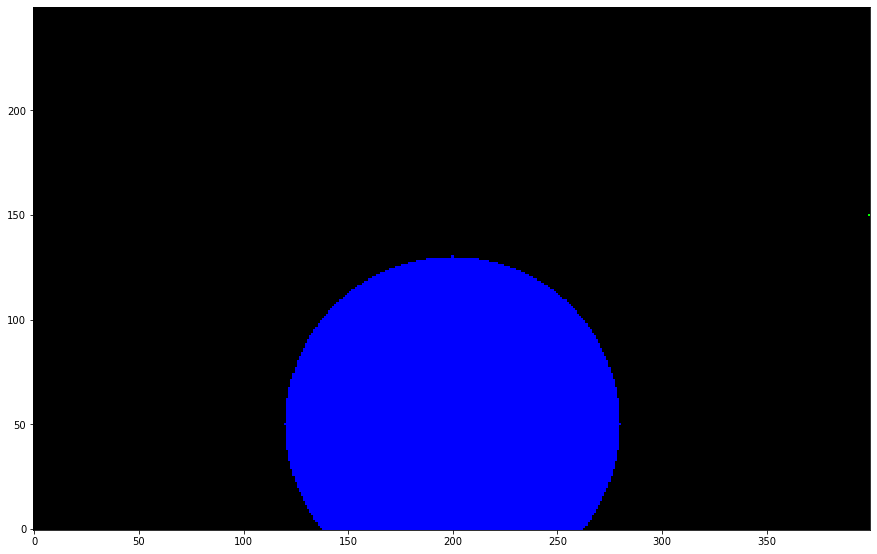

In [160]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.imshow(color_map, origin='bottom')